# Fruits and Vegetables Image Classification

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

### Define Dataset Paths and Image Dimensions

In [9]:
data_train_path = "Fruits_Vegetables/train"
data_test_path = "Fruits_Vegetables/test"
data_val_path = "Fruits_Vegetables/validation"

In [11]:
img_width = 180
img_height = 180

### Load Dataset

In [12]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 3115 files belonging to 36 classes.


In [17]:
data_cat = data_train.class_names

In [18]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size=(img_height, img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 351 files belonging to 36 classes.


In [19]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_height, img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


### Visualize Sample Images

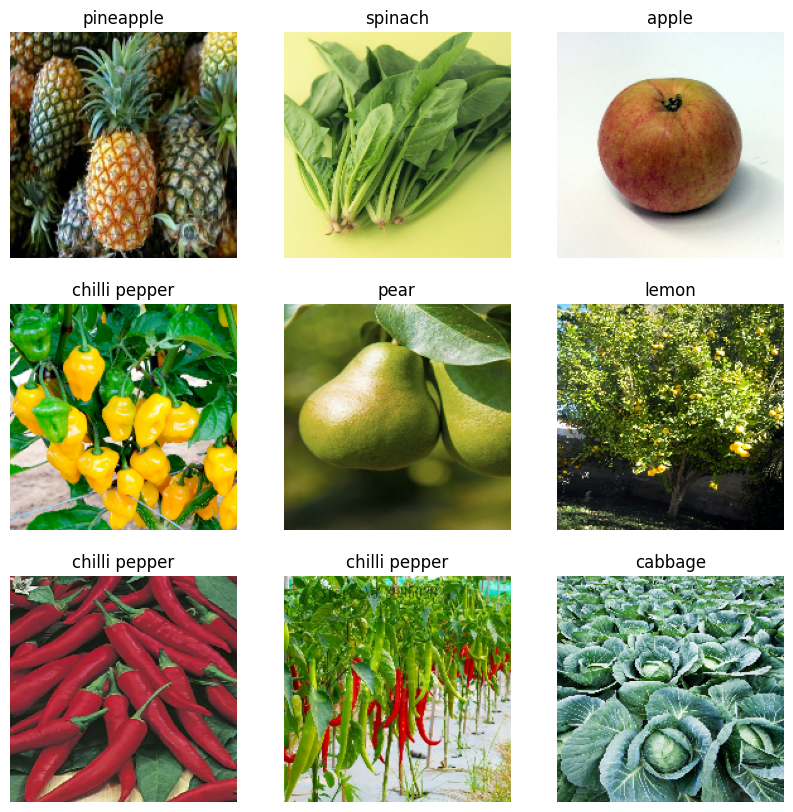

In [20]:
plt.figure(figsize=(10, 10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis("off")

### Define the Model Architecture


In [21]:
from tensorflow.keras.models import Sequential

In [22]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
model = Sequential([
    layers.Rescaling(1./225),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [24]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

### Train the model

In [25]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 32s 310ms/step - accuracy: 0.0617 - loss: 3.7667 - val_accuracy: 0.3105 - val_loss: 2.4240
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 301ms/step - accuracy: 0.2604 - loss: 2.5532 - val_accuracy: 0.6553 - val_loss: 1.3885
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 293ms/step - accuracy: 0.4494 - loss: 1.8882 - val_accuracy: 0.8433 - val_loss: 0.7541
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 306ms/step - accuracy: 0.6543 - loss: 1.1706 - val_accuracy: 0.8946 - val_loss: 0.4806
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 301ms/step - accuracy: 0.8252 - loss: 0.6448 - val_accuracy: 0.9117 - val_loss: 0.5045
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 299ms/step - accuracy: 0.9316 - loss: 0.3093 - val_accuracy: 0.9345 - val_loss: 0.4758
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 304ms/step - accuracy: 0.9579 - loss: 0.2192 - val_accuracy: 0.9316 - val_loss: 0.4395
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 300ms/step - accuracy: 0.9630 - loss: 0.1739 - val_accu

### Visualize Training and Validation Performance

Text(0.5, 1.0, 'Loss')

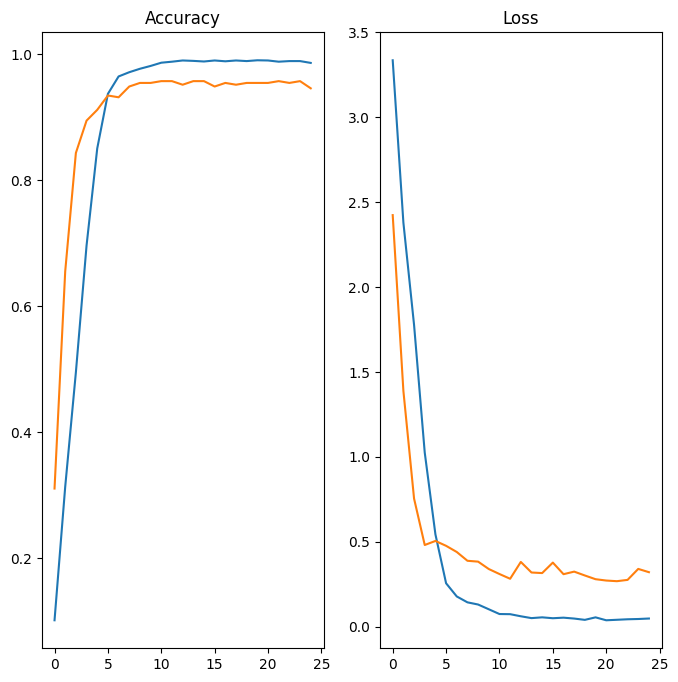

In [26]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')

### Make Predictions on a Custom Image

In [34]:
image = 'samples/mango.jpeg'
image = tf.keras.utils.load_img(image, target_size=(img_height, img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr, 0)

In [37]:
predict = model.predict(img_bat)
score = tf.nn.softmax(predict)
print(f'Veg/Fruit in image is {data_cat[np.argmax(score)]}')
print(f'accuracy of {np.max(score) * 100:0.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Veg/Fruit in image is mango
accuracy of 99.85%
